In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Clasificador con árbol de decisión

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data', header = None)
cols = ['ID', 'Diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean',
        'concavity_mean', 'concave_points_mean', 'simmetry_mean', 'fractal_dim_mean', 'radius_sd', 'texture_sd', 'perimeter_sd',
        'area_sd', 'smoothness_sd', 'compactness_sd', 'concavity_sd', 'concave_points_sd', 'simmetry_sd', 'fractal_dim_sd',
        'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
        'concavity_worst', 'concave_points_worst', 'simmetry_worst', 'fractal_dim_worst']
df.columns = cols
df.head()

,ID,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,simmetry_worst,fractal_dim_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.set_index('ID', inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 569 entries, 842302 to 92751
Data columns (total 31 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diagnosis             569 non-null    object 
 1   radius_mean           569 non-null    float64
 2   texture_mean          569 non-null    float64
 3   perimeter_mean        569 non-null    float64
 4   area_mean             569 non-null    float64
 5   smoothness_mean       569 non-null    float64
 6   compactness_mean      569 non-null    float64
 7   concavity_mean        569 non-null    float64
 8   concave_points_mean   569 non-null    float64
 9   simmetry_mean         569 non-null    float64
 10  fractal_dim_mean      569 non-null    float64
 11  radius_sd             569 non-null    float64
 12  texture_sd            569 non-null    float64
 13  perimeter_sd          569 non-null    float64
 14  area_sd               569 non-null    float64
 15  smoothness_sd        

In [ ]:
df.Diagnosis.value_counts()

,count
Diagnosis,
B,357
M,212


In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('Diagnosis', axis = 1)
y = df['Diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(398, 30)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
train_score = f1_score(y_train, model.predict(X_train), average='weighted')
test_score = f1_score(y_test, model.predict(X_test), average='weighted')
print(f'Train score: {train_score:.2f}')
print(f'Test score: {test_score:.2f}')

Train score: 1.00
Test score: 0.95


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, model.predict(X_train)))

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       249
           M       1.00      1.00      1.00       149

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398



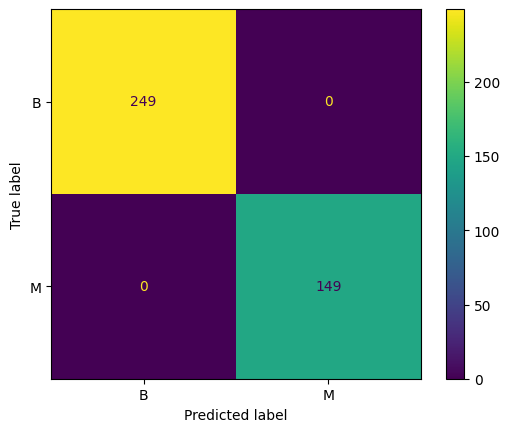

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_train, y_train);

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, model.predict(X_test)))

              precision    recall  f1-score   support

           B       0.95      0.97      0.96       108
           M       0.95      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



¡Los árboles de decisión tienden a sobreajustarse!

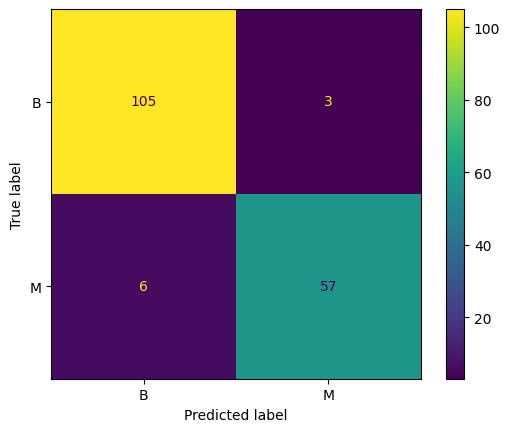

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);

In [ ]:
from sklearn.tree import export_text
r = export_text(model, feature_names=list(X.columns.values))
print(r)

|--- perimeter_worst <= 104.95
|   |--- concave_points_worst <= 0.14
|   |   |--- radius_sd <= 0.64
|   |   |   |--- class: B
|   |   |--- radius_sd >  0.64
|   |   |   |--- perimeter_sd <= 4.25
|   |   |   |   |--- class: M
|   |   |   |--- perimeter_sd >  4.25
|   |   |   |   |--- class: B
|   |--- concave_points_worst >  0.14
|   |   |--- texture_worst <= 26.90
|   |   |   |--- class: B
|   |   |--- texture_worst >  26.90
|   |   |   |--- fractal_dim_sd <= 0.00
|   |   |   |   |--- class: B
|   |   |   |--- fractal_dim_sd >  0.00
|   |   |   |   |--- class: M
|--- perimeter_worst >  104.95
|   |--- texture_worst <= 20.65
|   |   |--- area_worst <= 964.40
|   |   |   |--- class: B
|   |   |--- area_worst >  964.40
|   |   |   |--- concavity_mean <= 0.06
|   |   |   |   |--- class: B
|   |   |   |--- concavity_mean >  0.06
|   |   |   |   |--- class: M
|   |--- texture_worst >  20.65
|   |   |--- concave_points_mean <= 0.05
|   |   |   |--- compactness_sd <= 0.02
|   |   |   |   |--- 

# Prunning (podado)

Ya se vio que los árboles de decisión se sobreajustan, así que es imprescindible intentar redcir la complejidad de estos para que generalicen mejor.

En el contexto de los árboles a este proceso de reducción de complejidad se le conoce como podado o **prunning**.

Hay varios métodos que se pueden usar para hacer esto. Vamos a ver los 2 más comunes.

## Factor de complejidad ccp_alpha

El factor de comlejidad ccp_alpha es un hiperparámetro que hace podado basado en costos: Un valor ccp_alpha determina un umbral de costo a partir del cual se podan las ramas del árbol.

El algoritmo comienza podando los nodos que menos contribuyen a la reducción del error de clasificación, es decir, los "enlaces más débiles".

Al aumentar el valor de ccp_alpha, se podan más nodos, resultando en un árbol más simple.

Valores más altos de ccp_alpha conducen a árboles más pequeños y simples.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

dist = {'ccp_alpha':loguniform(1e-3, 1e2)}
grid_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(), param_distributions=dist, scoring='f1_weighted')
grid_search.fit(X_train, y_train_le)

test_score = f1_score(y_test_le, grid_search.predict(X_test), average='weighted')

print(f'Best score: {grid_search.best_score_:.2f} with {grid_search.best_params_}')
print(f'Test score: {test_score:.2f}')

Best score: 0.95 with {'ccp_alpha': 0.015255779765951683}
Test score: 0.86


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_le, grid_search.best_estimator_.predict(X_test), labels=[0, 1], target_names=le.classes_))

              precision    recall  f1-score   support

           B       0.88      0.92      0.90       108
           M       0.84      0.78      0.81        63

    accuracy                           0.87       171
   macro avg       0.86      0.85      0.85       171
weighted avg       0.86      0.87      0.86       171



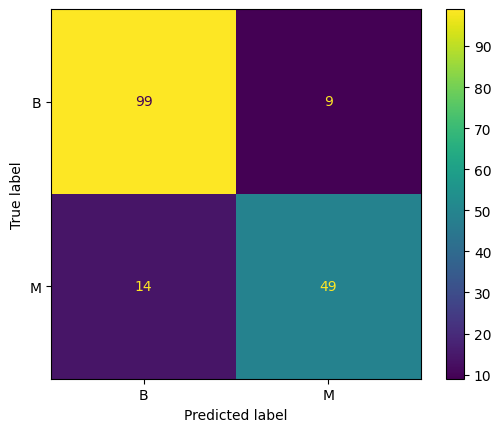

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test_le, display_labels=le.classes_);

In [ ]:
from sklearn.tree import export_text
r = export_text(grid_search.best_estimator_, feature_names=list(X.columns.values))
print(r)

|--- perimeter_worst <= 104.95
|   |--- class: 0
|--- perimeter_worst >  104.95
|   |--- texture_worst <= 20.65
|   |   |--- class: 0
|   |--- texture_worst >  20.65
|   |   |--- class: 1



## Métodos pre-poda

En estos mátodos se establece un criterio para detener el crecimiento del árbol antes de que se vuelva demasiado complejo. Por ejemplo, se puede limitar la profundidad máxima del árbol (hiperparámetro **max_depth**) o el número mínimo de muestras por hoja (**min_samples_leaf**).

Ventajas: Es computacionalmente más eficiente que podar por factor de complejidad, ya que evita construir un árbol completo y luego podarlo.

Desventajas: Puede resultar en un árbol sub-óptimo si el criterio de detención es demasiado restrictivo.

In [ ]:
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier

le = LabelEncoder()
y_train_le = le.fit_transform(y_train)
y_test_le = le.fit_transform(y_test)

grid = {'max_depth': np.arange(3,8)}
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid=grid, scoring='f1_weighted')
grid_search.fit(X_train, y_train_le)

test_score = f1_score(y_test_le, grid_search.predict(X_test), average='weighted')

print(f'Best score: {grid_search.best_score_:.2f} with {grid_search.best_params_}')
print(f'Test score: {test_score:.2f}')

Best score: 0.94 with {'max_depth': 3}
Test score: 0.88


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_le, grid_search.best_estimator_.predict(X_test), labels=[0, 1], target_names=le.classes_))

              precision    recall  f1-score   support

           B       0.92      0.89      0.91       108
           M       0.82      0.87      0.85        63

    accuracy                           0.88       171
   macro avg       0.87      0.88      0.88       171
weighted avg       0.89      0.88      0.88       171



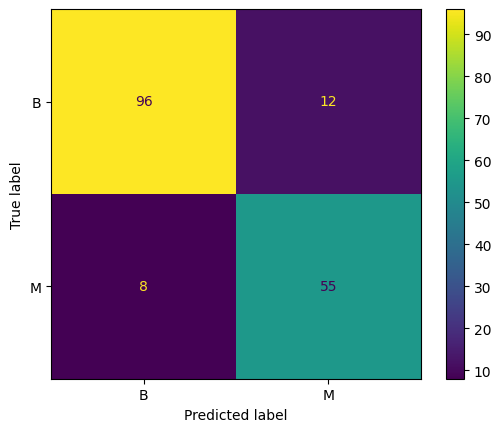

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(grid_search.best_estimator_, X_test, y_test_le, display_labels=le.classes_);

In [ ]:
from sklearn.tree import export_text
r = export_text(grid_search.best_estimator_, feature_names=list(X.columns.values))
print(r)

|--- perimeter_worst <= 104.95
|   |--- concave_points_worst <= 0.14
|   |   |--- area_sd <= 48.98
|   |   |   |--- class: 0
|   |   |--- area_sd >  48.98
|   |   |   |--- class: 0
|   |--- concave_points_worst >  0.14
|   |   |--- texture_worst <= 26.90
|   |   |   |--- class: 0
|   |   |--- texture_worst >  26.90
|   |   |   |--- class: 1
|--- perimeter_worst >  104.95
|   |--- texture_worst <= 20.65
|   |   |--- concavity_worst <= 0.32
|   |   |   |--- class: 0
|   |   |--- concavity_worst >  0.32
|   |   |   |--- class: 1
|   |--- texture_worst >  20.65
|   |   |--- concave_points_mean <= 0.05
|   |   |   |--- class: 1
|   |   |--- concave_points_mean >  0.05
|   |   |   |--- class: 1



## Importancia de cada característica

In [ ]:
df_features = pd.DataFrame({'Feature': X.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
df_features.sort_values('Importance', ascending=False)

,Feature,Importance
22,perimeter_worst,0.826897
21,texture_worst,0.098153
26,concavity_worst,0.024712
7,concave_points_mean,0.024002
27,concave_points_worst,0.022425
13,area_sd,0.003810
0,radius_mean,0.000000
16,concavity_sd,0.000000
28,simmetry_worst,0.000000
25,compactness_worst,0.000000


# Regresor con árbol de decisión

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data', sep='\s+', header=None, na_values='?')
cols = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df.columns = cols
df.set_index('car name', inplace=True)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
car name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130.0,3504.0,12.0,70,1
buick skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,1
plymouth satellite,18.0,8,318.0,150.0,3436.0,11.0,70,1
amc rebel sst,16.0,8,304.0,150.0,3433.0,12.0,70,1
ford torino,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 28.0+ KB


**Los árboles funcionan con datasets que tienen datos nulos.**

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop('mpg', axis=1)
y = df[['mpg']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

print(f'Train score: {root_mean_squared_error(y_train, model.predict(X_train)):.2f}')
print(f'Test score: {root_mean_squared_error(y_test, model.predict(X_test)):.2f}')

Train score: 0.00
Test score: 3.72


In [ ]:
from sklearn.tree import export_text
r = export_text(model, feature_names=list(X.columns.values))
print(r)

|--- cylinders <= 5.50
|   |--- horsepower <= 71.50
|   |   |--- model year <= 77.50
|   |   |   |--- weight <= 2119.00
|   |   |   |   |--- origin <= 2.50
|   |   |   |   |   |--- model year <= 76.50
|   |   |   |   |   |   |--- weight <= 1981.50
|   |   |   |   |   |   |   |--- acceleration <= 14.75
|   |   |   |   |   |   |   |   |--- model year <= 75.50
|   |   |   |   |   |   |   |   |   |--- value: [29.00]
|   |   |   |   |   |   |   |   |--- model year >  75.50
|   |   |   |   |   |   |   |   |   |--- value: [29.50]
|   |   |   |   |   |   |   |--- acceleration >  14.75
|   |   |   |   |   |   |   |   |--- weight <= 1834.50
|   |   |   |   |   |   |   |   |   |--- value: [27.00]
|   |   |   |   |   |   |   |   |--- weight >  1834.50
|   |   |   |   |   |   |   |   |   |--- value: [26.00]
|   |   |   |   |   |   |--- weight >  1981.50
|   |   |   |   |   |   |   |--- displacement <= 82.00
|   |   |   |   |   |   |   |   |--- weight <= 2037.00
|   |   |   |   |   |   |   |   |   |

## Con podado

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

dist = {'ccp_alpha':loguniform(1e-3, 1e2)}
grid_search = RandomizedSearchCV(estimator=DecisionTreeRegressor(), cv=5, param_distributions=dist, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

test_score = root_mean_squared_error(y_test, grid_search.predict(X_test))
print(f'Best score: {-grid_search.best_score_:.2f} with {grid_search.best_params_}')
print(f'Test score: {test_score:.2f}')

Best score: 3.51 with {'ccp_alpha': 0.2819703045841799}
Test score: 3.90


In [ ]:
from sklearn.tree import export_text
r = export_text(grid_search.best_estimator_, feature_names=list(X.columns.values))
print(r)

|--- cylinders <= 5.50
|   |--- horsepower <= 71.50
|   |   |--- model year <= 77.50
|   |   |   |--- weight <= 2119.00
|   |   |   |   |--- value: [30.59]
|   |   |   |--- weight >  2119.00
|   |   |   |   |--- value: [24.50]
|   |   |--- model year >  77.50
|   |   |   |--- horsepower <= 56.00
|   |   |   |   |--- value: [43.70]
|   |   |   |--- horsepower >  56.00
|   |   |   |   |--- weight <= 2132.50
|   |   |   |   |   |--- horsepower <= 67.50
|   |   |   |   |   |   |--- value: [38.23]
|   |   |   |   |   |--- horsepower >  67.50
|   |   |   |   |   |   |--- value: [33.63]
|   |   |   |   |--- weight >  2132.50
|   |   |   |   |   |--- value: [31.83]
|   |--- horsepower >  71.50
|   |   |--- model year <= 78.50
|   |   |   |--- weight <= 2271.50
|   |   |   |   |--- value: [26.59]
|   |   |   |--- weight >  2271.50
|   |   |   |   |--- value: [23.01]
|   |   |--- model year >  78.50
|   |   |   |--- weight <= 2590.00
|   |   |   |   |--- value: [34.13]
|   |   |   |--- weight > 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import root_mean_squared_error

grid = {'max_depth': np.arange(3,8)}
grid_search = GridSearchCV(estimator=DecisionTreeRegressor(), cv=5, param_grid=grid, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

test_score = root_mean_squared_error(y_test, grid_search.predict(X_test))
print(f'Best score: {-grid_search.best_score_:.2f} with {grid_search.best_params_}')
print(f'Test score: {test_score:.2f}')

Best score: 3.47 with {'max_depth': 4}
Test score: 3.74


In [ ]:
from sklearn.tree import export_text
r = export_text(grid_search.best_estimator_, feature_names=list(X.columns.values))
print(r)

|--- cylinders <= 5.50
|   |--- horsepower <= 71.50
|   |   |--- model year <= 77.50
|   |   |   |--- weight <= 2119.00
|   |   |   |   |--- value: [30.59]
|   |   |   |--- weight >  2119.00
|   |   |   |   |--- value: [24.50]
|   |   |--- model year >  77.50
|   |   |   |--- horsepower <= 56.00
|   |   |   |   |--- value: [43.70]
|   |   |   |--- horsepower >  56.00
|   |   |   |   |--- value: [35.45]
|   |--- horsepower >  71.50
|   |   |--- model year <= 78.50
|   |   |   |--- weight <= 2271.50
|   |   |   |   |--- value: [26.59]
|   |   |   |--- weight >  2271.50
|   |   |   |   |--- value: [23.01]
|   |   |--- model year >  78.50
|   |   |   |--- weight <= 2590.00
|   |   |   |   |--- value: [34.13]
|   |   |   |--- weight >  2590.00
|   |   |   |   |--- value: [27.37]
|--- cylinders >  5.50
|   |--- horsepower <= 139.50
|   |   |--- model year <= 79.50
|   |   |   |--- displacement <= 241.00
|   |   |   |   |--- value: [19.81]
|   |   |   |--- displacement >  241.00
|   |   |   |

In [ ]:
df_features = pd.DataFrame({'Feature': X.columns, 'Importance': grid_search.best_estimator_.feature_importances_})
df_features.sort_values('Importance', ascending=False)

,Feature,Importance
0,cylinders,0.633786
2,horsepower,0.192563
5,model year,0.120610
3,weight,0.046785
1,displacement,0.006256
4,acceleration,0.000000
6,origin,0.000000


# Con estandarización de datos

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.metrics import root_mean_squared_error

num_vars = ['displacement', 'horsepower', 'weight', 'acceleration'] # Se definen las variables numéricas
ohe = OneHotEncoder(sparse_output=False, drop='first')
oe_cyl = OrdinalEncoder(categories=[[3., 4., 5., 6., 8.]])
oe_my = OrdinalEncoder(categories=[[70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81., 82.]])
ss = StandardScaler()

preprocessor = ColumnTransformer(transformers=[('ohe', ohe, ['origin']), # Codificacióp OneHot para la variable 'origin'
                                               ('oe_cylinders', oe_cyl, ['cylinders']), # Codificación ordinal para la variable 'cylinders'
                                               ('oe_model_year', oe_my, ['model year']), # Codificación ordinal para la variable 'model_year'
                                               ('ss', ss, num_vars)], # Prepocesamiento de las variables numéricas
                                               remainder='passthrough') # El resto de las columnas se mantienen sin cambios

pipe = Pipeline([('preprocessor', preprocessor), ('model', DecisionTreeRegressor(random_state=1))]) # Se define un pipeline con el preprocesador y el modelo Ridge
dist = {'model__ccp_alpha':loguniform(1e-3, 1e2)}
grid_search = RandomizedSearchCV(estimator=pipe, cv=5, param_distributions=dist, scoring='neg_root_mean_squared_error')
grid_search.fit(X_train, y_train)

print(f'Mejor RMSE obtenido fue {-grid_search.best_score_:.3} con hiperparámetros de {grid_search.best_params_}')
print(f'Error de prueba: {root_mean_squared_error(y_test, grid_search.best_estimator_.predict(X_test)):.3f}')

Mejor RMSE obtenido fue 3.55 con hiperparámetros de {'model__ccp_alpha': 0.3074097985504381}
Error de prueba: 3.901


**La estandarización de datos generalmente no mejora el desempeño de los árboles de decisión de manera significativa.**

### ¿Por qué?

* **Invariante a escalamiento:** Los árboles de decisión basan sus decisiones en la creación de umbrales en las características. Estos umbrales se ajustan automáticamente a la escala de cada característica. Por lo tanto, si escalamos los datos, los umbrales simplemente se ajustarán en proporción, sin afectar el resultado final.
* **Importancia relativa:** Lo que realmente importa en un árbol de decisión es la importancia relativa de cada característica, no su escala absoluta. Si una característica tiene una mayor varianza que otra, esto simplemente significa que es más importante para la toma de decisiones.

### ¿Cuándo podría ser útil la estandarización?

* **Comparación con otros modelos:** Si se desea comparar el rendimiento de un árbol de decisión con otros modelos que sí se ven afectados por la escala de los datos (como las redes neuronales o los métodos lineales), es recomendable estandarizar los datos para que la comparación sea justa.
* **Algoritmos híbridos:** En algunos casos, los árboles de decisión se utilizan como parte de algoritmos más complejos que sí se benefician de la estandarización.
* **Preprocesamiento adicional:** Si se planea aplicar otras técnicas de preprocesamiento, como la reducción de dimensionalidad, la estandarización puede ser un paso previo útil.

### Conclusiones

En general, la estandarización no es un paso necesario para entrenar árboles de decisión. Sin embargo, puede ser útil en ciertas situaciones específicas, como cuando se comparan con otros modelos o cuando se realizan preprocesamientos adicionales.

**Es importante destacar que cada conjunto de datos es único y los resultados pueden variar.** Siempre es recomendable experimentar con diferentes técnicas de preprocesamiento para encontrar la mejor configuración para tu problema específico.
